## Customer Churn Classification

#### Importing Libraries

In [2]:
import pandas as pd # importing pandas library for data manipulation and analysis
import numpy as np # importing numpy library for numerical operations
import matplotlib.pyplot as plt # importing matplotlib for data visualization
import seaborn as sns # importing seaborn for statistical data visualization
from sklearn.model_selection import train_test_split # importing train_test_split for splitting data into training and testing sets
from sklearn.ensemble import RandomForestClassifier # importing RandomForestClassifier for classification tasks
from xgboost import XGBClassifier # importing XGBClassifier for classification tasks 

#### Data collecting and Analysis

In [3]:
# Loading the customer churn dataset from a CSV file
customer_churn = pd.read_csv(r"D:\Additional-projects\customer_churn\customer_churn_dataset.csv")

In [4]:
# Displaying the first few rows of the dataset
customer_churn.head()

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,1,52,54.20,2818.40,Month-to-month,Credit,DSL,No,Yes,1,No
1,2,15,35.28,529.20,Month-to-month,Debit,DSL,No,No,2,No
2,3,72,78.24,5633.28,Month-to-month,Debit,DSL,No,No,0,No
3,4,61,80.24,4894.64,One year,Cash,Fiber,Yes,Yes,0,No
4,5,21,39.38,826.98,Month-to-month,UPI,Fiber,No,No,4,Yes


In [5]:
# Displaying the structure and summary of the dataset
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       20000 non-null  int64  
 1   tenure            20000 non-null  int64  
 2   monthly_charges   20000 non-null  float64
 3   total_charges     20000 non-null  float64
 4   contract          20000 non-null  object 
 5   payment_method    20000 non-null  object 
 6   internet_service  17987 non-null  object 
 7   tech_support      20000 non-null  object 
 8   online_security   20000 non-null  object 
 9   support_calls     20000 non-null  int64  
 10  churn             20000 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.7+ MB


In [6]:
# Checking for missing values in the dataset
customer_churn.isnull().sum()

customer_id            0
tenure                 0
monthly_charges        0
total_charges          0
contract               0
payment_method         0
internet_service    2013
tech_support           0
online_security        0
support_calls          0
churn                  0
dtype: int64

In [7]:
customer_churn['internet_service'].value_counts()

internet_service
Fiber    10064
DSL       7923
Name: count, dtype: int64

In [8]:
# null values in internet service column are filled with using mode
customer_churn['internet_service'].fillna(customer_churn['internet_service'].mode()[0], inplace=True)

C:\Users\hb292\AppData\Local\Temp\ipykernel_25112\1617281871.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_churn['internet_service'].fillna(customer_churn['internet_service'].mode()[0], inplace=True)


In [9]:
# checking again for missing values after filling missing data
customer_churn.isnull().sum()

customer_id         0
tenure              0
monthly_charges     0
total_charges       0
contract            0
payment_method      0
internet_service    0
tech_support        0
online_security     0
support_calls       0
churn               0
dtype: int64

In [10]:
customer_churn.describe()

,customer_id,tenure,monthly_charges,total_charges,support_calls
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,10000.500000,36.467450,70.010531,2543.979209,1.51255
std,5773.647028,20.773984,28.890239,1882.949804,1.23524
min,1.000000,1.000000,20.000000,20.230000,0.00000
25%,5000.750000,18.000000,45.210000,1045.837500,1.00000
50%,10000.500000,36.000000,70.090000,2096.495000,1.00000
75%,15000.250000,54.000000,95.072500,3690.337500,2.00000
max,20000.000000,72.000000,120.000000,8629.920000,8.00000


### Categorical data
- contract         
- payment_method    
- internet_service  
- tech_support      
- online_security

<Axes: xlabel='contract', ylabel='count'>

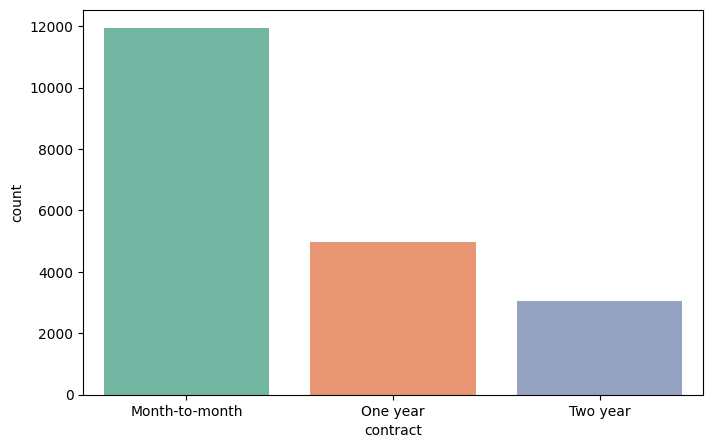

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(x='contract', data=customer_churn, hue='contract', palette='Set2')

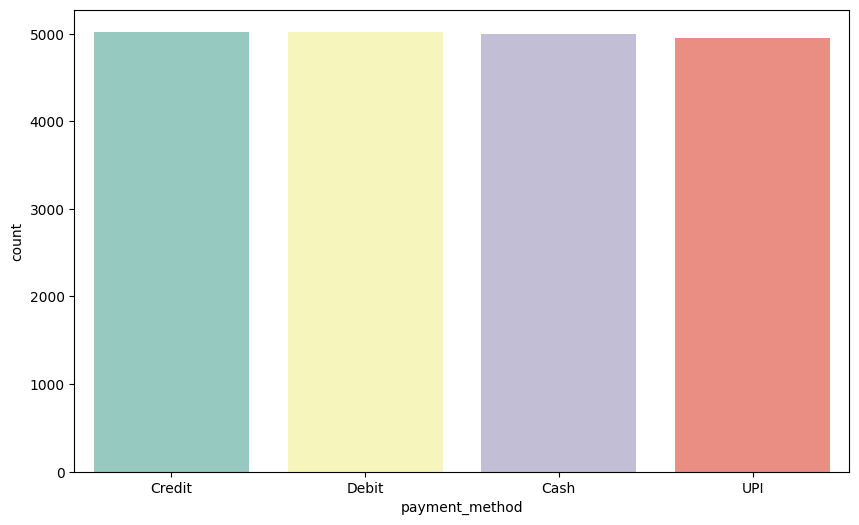

In [12]:
plt.figure(figsize=(10,6)) 
sns.countplot(x='payment_method', data=customer_churn , hue='payment_method', palette='Set3')
plt.show()

In [13]:
# Displaying the counts of different payment methods
customer_churn['payment_method'].value_counts()

payment_method
Credit    5026
Debit     5025
Cash      4995
UPI       4954
Name: count, dtype: int64

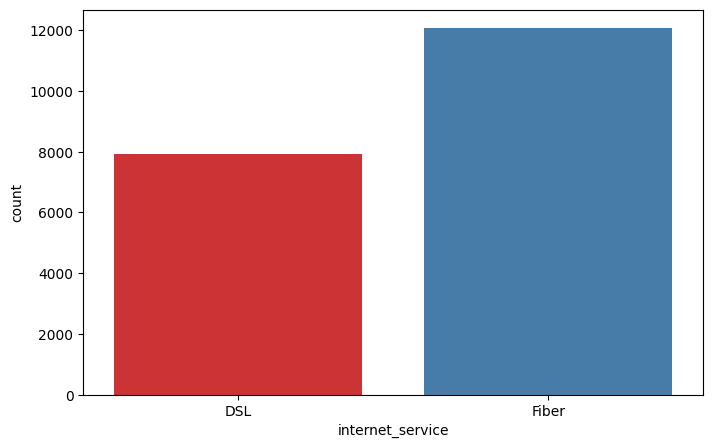

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x='internet_service', data=customer_churn, hue='internet_service', palette='Set1')
plt.show()

In [15]:
# checking again for values count
customer_churn['internet_service'].value_counts()

internet_service
Fiber    12077
DSL       7923
Name: count, dtype: int64

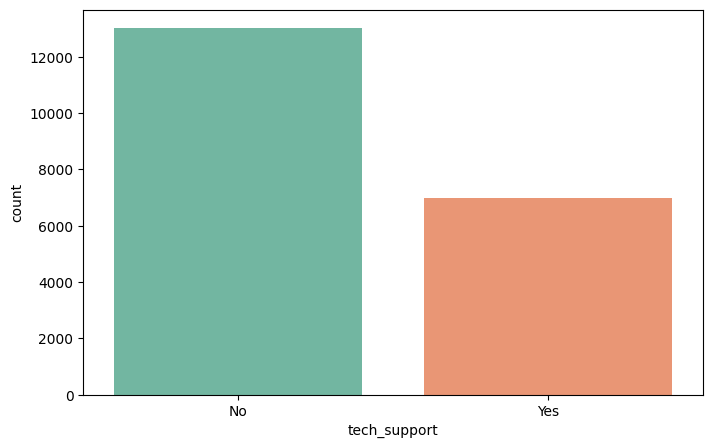

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x='tech_support', data=customer_churn, hue='tech_support', palette='Set2')
plt.show()

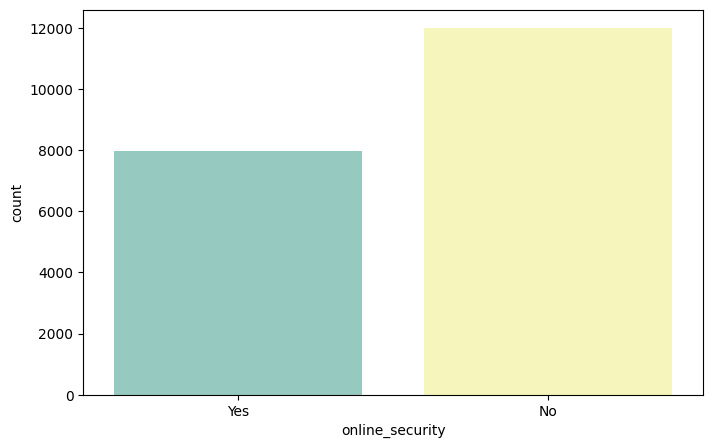

In [17]:
plt.figure(figsize=(8,5))  
sns.countplot(x='online_security', data=customer_churn, hue='online_security', palette='Set3')
plt.show()

#### Numerical Data

<Figure size 800x800 with 0 Axes>

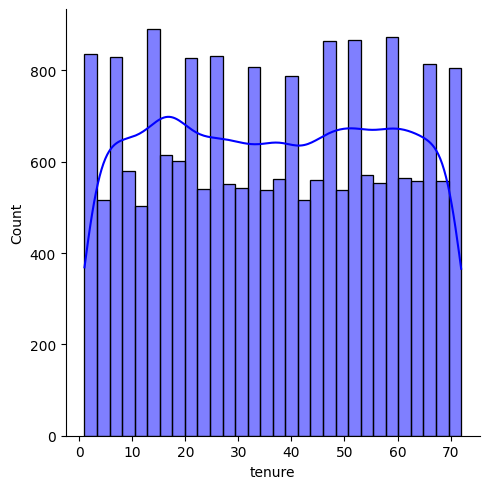

In [22]:
# plotting the distribution of tenure feature
plt.figure(figsize=(8,8))
sns.displot(customer_churn['tenure'], bins=30, kde=True, color='blue')

In [35]:
customer_churn['tenure'].unique()

array([52, 15, 72, 61, 21, 24,  3, 22, 53,  2, 30, 38, 64, 60, 33, 58, 49,
       59, 42, 62, 47, 51, 55,  7, 39, 18,  4, 14,  9, 71, 44,  8, 35, 36,
       50,  6, 54, 63, 34, 48, 40, 26, 41, 29, 45, 65,  1, 11,  5, 28, 12,
       23, 37, 27, 43, 13, 32, 66, 57, 70, 56, 19, 68, 17, 69, 16, 20, 67,
       31, 25, 46, 10])

<Figure size 800x1200 with 0 Axes>

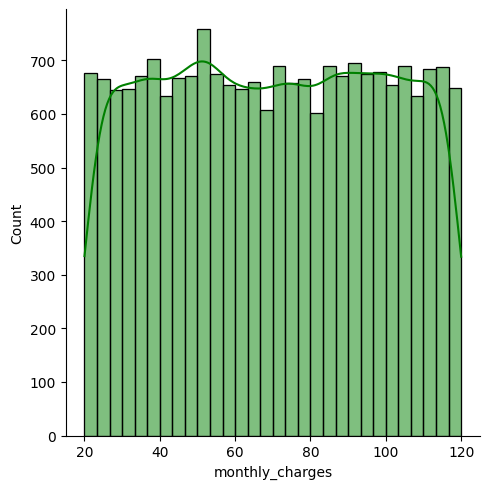

In [24]:
# plotting the distribution of the monthly_charges feature
plt.figure(figsize=(8,12))
sns.displot(customer_churn['monthly_charges'], bins=30, kde=True, color='green')

<Figure size 800x1200 with 0 Axes>

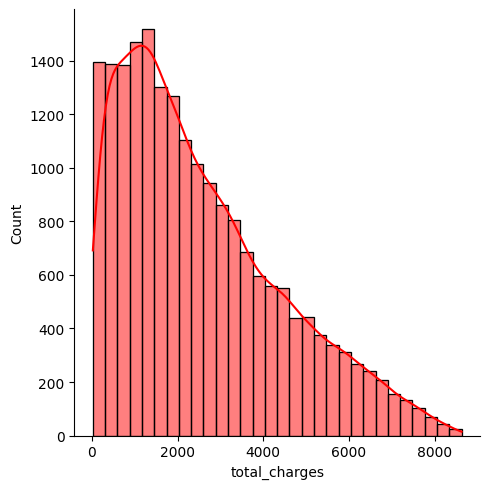

In [25]:
# plotting the distribution of the total_charges feature
plt.figure(figsize=(8,12))
sns.displot(customer_churn['total_charges'], bins=30, kde=True, color='red')

<Figure size 800x800 with 0 Axes>

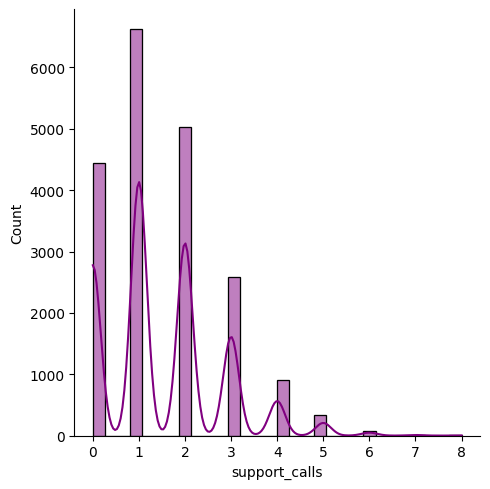

In [27]:
# plotting the distribution of the support_calls feature
plt.figure(figsize=(8,8))
sns.displot(customer_churn['support_calls'], bins=30, kde=True, color='purple')

In [28]:
customer_churn['support_calls'].value_counts()

support_calls
1    6622
2    5025
0    4448
3    2580
4     901
5     330
6      76
7      15
8       3
Name: count, dtype: int64

#### Checking if the features are:
- Positive Correlated
- negative correlated

C:\Users\hb292\AppData\Local\Temp\ipykernel_25112\2752387425.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tenure', y ='churn',data=customer_churn , palette='Set2')


<Axes: xlabel='tenure', ylabel='churn'>

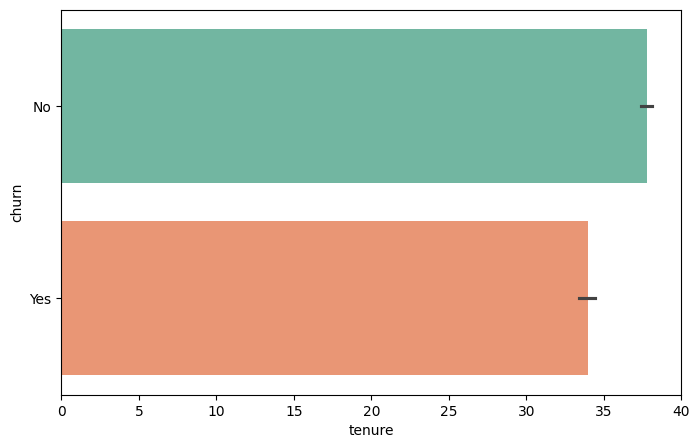

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(x='tenure', y ='churn',data=customer_churn , palette='Set2')